In [19]:
import yaml
from pathlib import Path
from utils import Tau3MuDataset, Root2Df, get_data_loaders
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
setting = 'GNN-full-dR-2-mix-debug'
config = yaml.safe_load(Path(f'./configs/{setting}.yml').open('r'))

In [4]:
data_loaders, x_dim, edge_attr_dim, dataset = get_data_loaders(setting, config['data'], batch_size=1)

[Splits]
    train: 303333. # pos: 70000, # neg: 233333. Pos:Neg: 0.300
    valid: 65000. # pos: 15000, # neg: 50000. Pos:Neg: 0.300
    test: 131267. # pos: 15000, # neg: 116267. Pos:Neg: 0.129


In [23]:
a = np.argwhere(dataset.data['y'] == 1)[0]

In [32]:
b = dataset.copy(a)

In [36]:
b.data.node_label.sum() / b.data.node_label.shape[0]

tensor(0.2524)

In [3]:
data_config = config['data']
data_dir = Path(data_config['data_dir'])
dfs = Root2Df(data_dir / 'raw').read_df(setting)

[INFO] Reading skim configuration file: ../data/raw/processing.cfg
[INFO] ../data/raw/MinBiasPU200_MTD.root loaded!
[INFO] ../data/raw/DsTau3muPU0_MTD.root loaded!
[INFO] ../data/raw/DsTau3muPU200_MTD.root loaded!


In [20]:
neg200 = dfs['MinBiasPU200_MTD']
pos200 = dfs['DsTau3muPU200_MTD']
pos0 = dfs.get('DsTau3muPU0_MTD', None)

In [21]:
pos0 = pos0[pos0.n_gen_tau == 1].reset_index(drop=True)

In [22]:
len(pos0)

466320

In [43]:
pos0 = pos0[pos0.n_gen_tau == 1].reset_index(drop=True)

In [82]:
a = pos0.apply(lambda x: (x['mu_hit_station'] == 2).sum(), axis=1)

(array([0.59100664, 0.05924762, 0.11663882, 0.06983072, 0.05948751,
        0.02200472, 0.04500139, 0.01261241, 0.01209373, 0.01207644]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

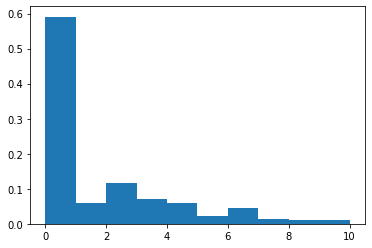

In [83]:
plt.hist(a, density=True, bins=10, range=(0, 10))

In [59]:
b = pos0['n_mu_hit']

(array([0.25224085, 0.19362067, 0.1689139 , 0.08846452, 0.06388345,
        0.04241498, 0.03959752, 0.0365751 , 0.03908103, 0.07520796]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

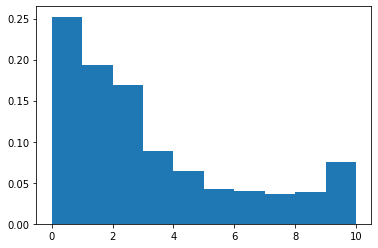

In [60]:
plt.hist(b, density=True, bins=10, range=(0, 10))

In [36]:
b = neg200.apply(lambda x: (x['mu_hit_station'] == 2).sum(), axis=1)

In [40]:
b = b[b < 10]

(array([0.38941522, 0.11632092, 0.17115473, 0.10762977, 0.10671087,
        0.05899328, 0.0713577 , 0.03672802, 0.0331827 , 0.0196179 ]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

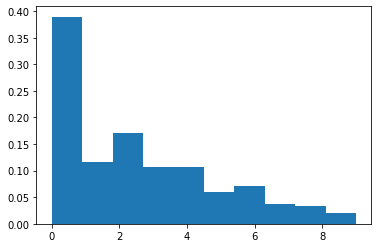

In [42]:
plt.hist(b, density=True)

In [47]:
# def filter_mu_by_pt_eta(x):
#     return ((x['gen_mu_pt'] > 0.5).sum() == 3) and ((abs(x['gen_mu_eta']) < 2.8).sum() == 3) and ((abs(x['gen_mu_eta']) > 1.2).sum() == 3)

def filters(x):
    # p = np.sqrt(x['gen_mu_e']**2 - 0.1057**2 + 1e-5)
    # pt = x['gen_mu_pt']
    # abs_eta = np.abs(x['gen_mu_eta'])
    return ((x['mu_hit_station'] <= 2).sum() >= 3) and ((x['mu_hit_station'] <= 2).sum() <= 5)
    # return ((p > 2.5).sum() == 3) and ((pt > 0.5).sum() == 3) and ((abs_eta < 2.8).sum() == 3) and ((x['mu_hit_station'] <= 2).sum() > 0) and ((x['mu_hit_station'] <= 2).sum() <= 10)

idx = pos0.apply(lambda x: filters(x), axis=1)

In [48]:
nosoft_pos0 = pos0[idx == True]

In [49]:
len(nosoft_pos0)

103659

In [156]:
c = nosoft_pos0.apply(lambda x: (x['mu_hit_station'] <= 2).sum(), axis=1)

(array([0.29545513, 0.26161772, 0.21078012, 0.        , 0.1914762 ,
        0.1466683 , 0.        , 0.13003848, 0.10268262, 0.08985285]),
 array([ 3. ,  3.7,  4.4,  5.1,  5.8,  6.5,  7.2,  7.9,  8.6,  9.3, 10. ]),
 <BarContainer object of 10 artists>)

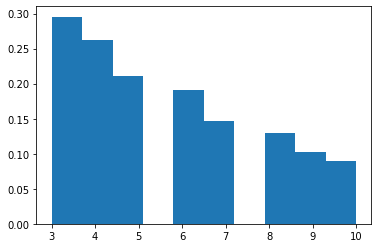

In [157]:
plt.hist(c, density=True)

In [23]:
def filter_mu_by_pt_eta(x):
    p = np.sqrt(x['gen_mu_e']**2 - 0.1057**2 + 1e-5)
    pt = x['gen_mu_pt']
    abs_eta = np.abs(x['gen_mu_eta'])

    cut_1 = ((p > 2.5).sum() == 3) and ((pt > 0.5).sum() == 3) and ((abs_eta < 2.8).sum() == 3)
    cut_2 = ((pt > 2.0).sum() >= 1) and ((abs_eta < 2.4).sum() >= 1)
    # return cut_1 * cut_2
    return (x['mu_hit_station'] <= 2).sum() >= 3


idx = pos0.apply(lambda x: filter_mu_by_pt_eta(x), axis=1)

In [24]:
nosoft_pos0 = pos0[idx == True]
len(nosoft_pos0)

236064

(array([0.29109254, 0.22344332, 0.19493105, 0.10209037, 0.07372318,
        0.048948  , 0.04569657, 0.04220862, 0.04510053, 0.04387691]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

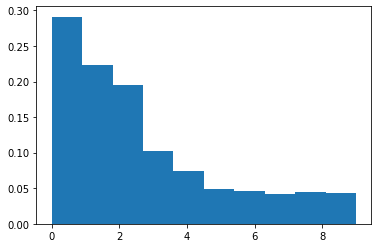

In [75]:
c = nosoft_pos0.apply(lambda x: (x['mu_hit_station'] <= 4).sum(), axis=1)
c = c[c < 10]
plt.hist(c, density=True)

In [41]:
len(neg200)

499600

In [43]:
100000 / (499600-100000)

0.2502502502502503